In [169]:
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy.stats import linregress


In [147]:
data= pd.read_csv('Grads_db2.csv')
data.head()
data.drop(columns= ['grad_100_rate','grad_150_rate'])

,Unnamed: 0,unitid,year,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,0,100654,2002,680.0,139.0,263.0,20.4,38.7
1,1,100654,2003,748.0,153.0,288.0,20.5,38.5
2,2,100654,2004,955.0,173.0,314.0,18.1,32.9
3,3,100654,2005,1046.0,91.0,339.0,8.7,32.4
4,4,100654,2006,967.0,112.0,326.0,11.6,33.7


In [5]:
new_df=pd.merge(data,bystate1_df, on= 'unitid', how= 'outer')
bystate= new_df.groupby(['state','year'])
total=bystate[['grad_cohort','grad_100','grad_150']].sum()
grupedby_state_year= total

In [7]:
by_year= new_df.groupby(['year'])
by_year2=by_year[['grad_cohort','grad_100','grad_150']].sum().reset_index()
by_year2

,year,grad_cohort,grad_100,grad_150
0,2002,99217.0,18949.0,39044.0
1,2003,101789.0,19400.0,41177.0
2,2004,105268.0,20949.0,43186.0
3,2005,107844.0,21957.0,44600.0
4,2006,109861.0,23078.0,46809.0
5,2007,113010.0,23878.0,47848.0
6,2008,116202.0,24262.0,48389.0
7,2009,118541.0,25567.0,49888.0
8,2010,124577.0,26026.0,51323.0
9,2011,125960.0,26051.0,52023.0


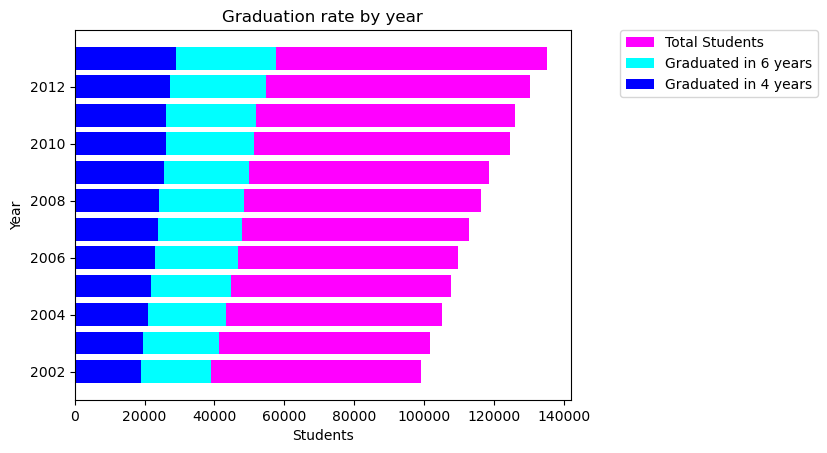

In [143]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y,xtotal, label='Total Students', color='magenta')
ax.barh(y,x150,color= 'cyan', label='Graduated in 6 years')
ax.barh(y,x100,color='blue', label='Graduated in 4 years')

ax.set_xlabel('Students')
ax.set_ylabel('Year')
ax.set_title('Graduation rate by year')
ax.legend(loc='best')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)


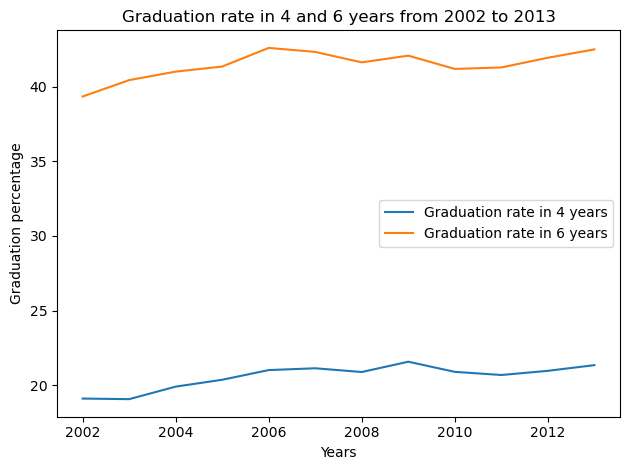

In [137]:
#by_year2
grad_rate100= (by_year2['grad_100']/by_year2['grad_cohort'])*100
grad_rate100= round(grad_rate100,2)
grad_rate150= (by_year2['grad_150']/by_year2['grad_cohort'])*100
grad_rate150= round(grad_rate150,2)
years= by_year2['year']
plt.plot(years, grad_rate100, label= 'Graduation rate in 4 years')
plt.plot(years, grad_rate150, label= 'Graduation rate in 6 years')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Graduation percentage')
plt.title("Graduation rate in 4 and 6 years from 2002 to 2013")
plt.tight_layout()
plt.show()

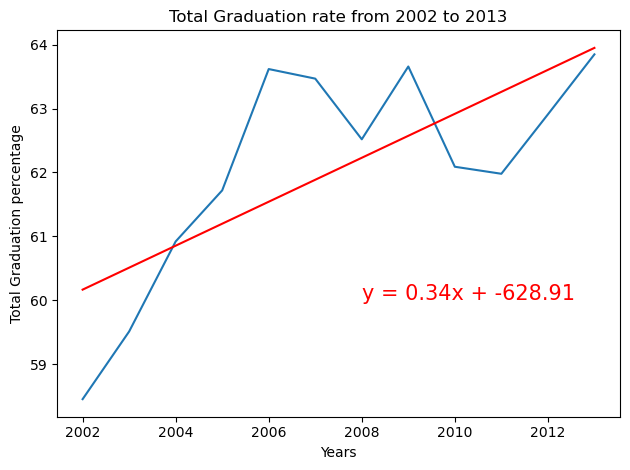

The r-squared is: 0.5281458704797771


In [172]:
total_grad_rate = grad_rate100 + grad_rate150
fig= plt.plot(kind='line')
plt.plot(years ,total_grad_rate)
plt.xlabel('Years')
plt.ylabel('Total Graduation percentage')
plt.title("Total Graduation rate from 2002 to 2013")
plt.tight_layout()

#linear regression on total graduation rate
# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(years, total_grad_rate)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(years,regress_values,"r-")
plt.annotate(line_eq,(2008,60),fontsize=15,color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

In [ ]:
data2= pd.read_csv('Inst2.csv')
data2.head()
bystate1_df=data2.drop(columns=['chronname','city','med_sat_value','aid_value','level','control','student_count','grad_100_value','grad_150_value'])
bystate1_df.head()